In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
%ls ../../../data/09_21

GCA_000210855.2_ASM21085v2_genomic.gff  dnaid2023/
SL1344.emapper.annotations              final_results_annotated.csv


In [3]:
dataDir = "../../../data/09_21/"
gff_file = Path(dataDir)/"GCA_000210855.2_ASM21085v2_genomic.gff"
emap_file = Path(dataDir)/"SL1344.emapper.annotations"

In [4]:
gff = pd.read_table(gff_file, skiprows=7, header=None)
gff.columns = ['chr', 'loc', 'feat', 'start', 'end', 'dn', 'strand', 'dn2', 'desc']

In [5]:
gff.head()

,chr,loc,feat,start,end,dn,strand,dn2,desc
0,FQ312003.1,EMBL,region,1.0,4878012.0,.,+,.,ID=FQ312003.1:1..4878012;Dbxref=taxon:216597;I...
1,FQ312003.1,EMBL,gene,169.0,255.0,.,+,.,ID=gene-SL1344_0001;Name=thrL;gbkey=Gene;gene=...
2,FQ312003.1,EMBL,CDS,169.0,255.0,.,+,0,ID=cds-CBW16102.1;Parent=gene-SL1344_0001;Dbxr...
3,FQ312003.1,EMBL,gene,337.0,2799.0,.,+,.,ID=gene-SL1344_0002;Name=thrA;gbkey=Gene;gene=...
4,FQ312003.1,EMBL,CDS,337.0,2799.0,.,+,0,ID=cds-CBW16103.1;Parent=gene-SL1344_0002;Dbxr...


In [6]:
def get_feat_id(x):
    if x is np.nan:
        return x
    elif 'gene-' in x or 'cds-' in x:
        return x.split(';')[0].split('-')[1]
    else:
        return x.split(';')[0]
    
def get_gene_name(x):
    if x is np.nan:
        return x
    elif 'ID=gene' in x:
        return x.split('Name=')[1].split(';')[0]
    elif 'ID=cds' in x and 'gene=' in x:
        return x.split('gene=')[1].split(';')[0]
    elif 'ID=cds' in x and 'Parent=' in x:
        return x.split('Parent=')[1].split(';')[0].split('-')[1]
    else:
        return x.split(';')[0].strip('ID=')

In [7]:
gff['feat_id'] = gff['desc'].apply(get_feat_id)
gff['Name'] = gff['desc'].apply(get_gene_name)

In [68]:
gff[['feat','feat_id', 'Name']]

,feat,feat_id,Name
0,region,ID=FQ312003.1:1..4878012,FQ312003.1:1..4878012
1,gene,SL1344_0001,thrL
2,CDS,CBW16102.1,thrL
3,gene,SL1344_0002,thrA
4,CDS,CBW16103.1,thrA
...,...,...,...
10278,gene,SL1344_P1_0103,SL1344_P1_0103
10279,CDS,CCF76808.1,SL1344_P1_0103
10280,gene,SL1344_P1_0104,SL1344_P1_0104
10281,CDS,CCF76809.1,SL1344_P1_0104


In [9]:
emap = pd.read_table(emap_file, skiprows=4)

In [10]:
emap.head()

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,CBW16103.1,90371.CY43_00005,0.000000e+00,1596.6,"COG0460@1|root,COG0527@1|root,COG0460@2|Bacter...",1236|Gammaproteobacteria,E,ACT domain,thrA,"GO:0003674,GO:0003824,GO:0004072,GO:0004412,GO...",...,"ko:K12524,ko:K12525","ko00260,ko00261,ko00270,ko00300,ko01100,ko0111...","M00016,M00017,M00018,M00526,M00527","R00480,R01773,R01775","RC00002,RC00043,RC00087","ko00000,ko00001,ko00002,ko01000",-,-,"iECDH1ME8569_1439.ECDH1ME8569_0002,iEcDH1_1363...","AA_kinase,ACT,ACT_7,Homoserine_dh,NAD_binding_3"
1,CBW16104.1,220341.16501286,5.700000e-177,626.7,"COG0083@1|root,COG0083@2|Bacteria,1MW8I@1224|P...",1236|Gammaproteobacteria,F,Catalyzes the ATP-dependent phosphorylation of...,thrB,"GO:0000096,GO:0000097,GO:0003674,GO:0003824,GO...",...,ko:K00872,"ko00260,ko01100,ko01110,ko01120,ko01230,map002...",M00018,R01771,"RC00002,RC00017","ko00000,ko00001,ko00002,ko01000",-,-,iECSE_1348.ECSE_0003,"GHMP_kinases_C,GHMP_kinases_N"
2,CBW16105.1,90371.CY43_00015,1.200000e-244,852.0,"COG0498@1|root,COG0498@2|Bacteria,1MUWQ@1224|P...",1236|Gammaproteobacteria,E,Threonine synthase N terminus,thrC,"GO:0003674,GO:0003824,GO:0004795,GO:0005575,GO...",...,ko:K01733,"ko00260,ko00750,ko01100,ko01110,ko01120,ko0123...",M00018,"R01466,R05086","RC00017,RC00526","ko00000,ko00001,ko00002,ko01000",-,-,"iLF82_1304.LF82_2261,iNRG857_1313.NRG857_00025","PALP,Thr_synth_N"
3,CBW16106.1,90371.CY43_00020,1.100000e-141,509.2,"COG3022@1|root,COG3022@2|Bacteria,1MUAF@1224|P...",1236|Gammaproteobacteria,S,Peroxide stress protein YaaA,yaaA,"GO:0005575,GO:0005622,GO:0005623,GO:0005737,GO...",...,ko:K09861,-,-,-,-,ko00000,-,-,-,H2O2_YaaD
4,CBW16107.1,90371.CY43_00025,3.300000e-264,917.1,"COG1115@1|root,COG1115@2|Bacteria,1MUI3@1224|P...",1236|Gammaproteobacteria,U,Sodium:alanine symporter family,yaaJ,"GO:0005575,GO:0005623,GO:0005886,GO:0016020,GO...",...,ko:K03310,-,-,-,-,ko00000,2.A.25,-,iEcE24377_1341.EcE24377A_0007,Na_Ala_symp


In [11]:
gene_to_cds = gff[gff.feat == 'CDS'][['feat_id', 'Name', 'start']]

In [12]:
go_map = gene_to_cds.merge(emap, left_on='feat_id', right_on='#query', how='outer')

In [13]:
go_map = go_map.drop(go_map.tail(3).index)

In [16]:
go_map[go_map['KEGG_Pathway'].apply(term_in_gene, term='ko00010') == True]

,feat_id,Name,start,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
157,CBW16255.1,aceE,176244.0,CBW16255.1,90371.CY43_00760,0.000000e+00,1793.1,"COG2609@1|root,COG2609@2|Bacteria,1MV21@1224|P...",1236|Gammaproteobacteria,C,...,ko:K00163,"ko00010,ko00020,ko00620,ko01100,ko01110,ko0112...",M00307,"R00014,R00209,R01699,R03270","RC00004,RC00027,RC00627,RC02742,RC02744,RC02882","br01601,ko00000,ko00001,ko00002,ko01000",-,-,"e_coli_core.b0114,iAF1260.b0114,iBWG_1329.BWG_...",Transketolase_N
158,CBW16256.1,aceF,178922.0,CBW16256.1,90371.CY43_00765,4.400000e-309,1066.6,"COG0508@1|root,COG0508@2|Bacteria,1MU7K@1224|P...",1236|Gammaproteobacteria,C,...,ko:K00627,"ko00010,ko00020,ko00620,ko01100,ko01110,ko0112...",M00307,"R00209,R02569","RC00004,RC02742,RC02857","br01601,ko00000,ko00001,ko00002,ko01000",-,-,"iETEC_1333.ETEC_0111,iSSON_1240.SSON_0123,iYL1...","2-oxoacid_dh,Biotin_lipoyl,E3_binding"
159,CBW16257.1,lpdA,181011.0,CBW16257.1,637910.ROD_01221,1.400000e-270,938.3,"COG1249@1|root,COG1249@2|Bacteria,1MU2U@1224|P...",1236|Gammaproteobacteria,C,...,ko:K00382,"ko00010,ko00020,ko00260,ko00280,ko00620,ko0063...","M00009,M00011,M00036,M00307,M00532","R00209,R01221,R01698,R03815,R07618,R08549","RC00004,RC00022,RC00583,RC02742,RC02833,RC02834","br01601,ko00000,ko00001,ko00002,ko01000,ko04147",-,-,"iAPECO1_1312.APECO1_1869,iEcolC_1368.EcolC_354...","Biotin_lipoyl,Pyr_redox_2,Pyr_redox_dim"
398,CBW16488.1,yajF,443452.0,CBW16488.1,90371.CY43_02290,7.600000e-166,589.7,"COG1940@1|root,COG1940@2|Bacteria,1MU94@1224|P...",1236|Gammaproteobacteria,GK,...,"ko:K00845,ko:K00847","ko00010,ko00051,ko00052,ko00500,ko00520,ko0052...","M00001,M00549","R00299,R00760,R00867,R01600,R01786,R03920","RC00002,RC00017","ko00000,ko00001,ko00002,ko01000",-,-,"iECSE_1348.ECSE_0415,iEcHS_1320.EcHS_A0462,iPC...",ROK
674,CBW16763.1,nagC,741103.0,CBW16763.1,90371.CY43_03700,4.600000e-227,793.5,"COG1846@1|root,COG1940@1|root,COG1846@2|Bacter...",1236|Gammaproteobacteria,K,...,"ko:K00845,ko:K02565","ko00010,ko00052,ko00500,ko00520,ko00521,ko0052...","M00001,M00549","R00299,R01600,R01786","RC00002,RC00017","ko00000,ko00001,ko00002,ko01000,ko03000",-,-,-,"MarR,ROK"
690,CBW16779.1,pgm,759169.0,CBW16779.1,90371.CY43_03780,0.000000e+00,1077.8,"COG0033@1|root,COG0033@2|Bacteria,1MU5S@1224|P...",1236|Gammaproteobacteria,G,...,ko:K01835,"ko00010,ko00030,ko00052,ko00230,ko00500,ko0052...",M00549,"R00959,R01057,R08639",RC00408,"ko00000,ko00001,ko00002,ko01000",-,-,"iAPECO1_1312.APECO1_1376,iECED1_1282.ECED1_067...","PGM_PMM_I,PGM_PMM_II,PGM_PMM_III,PGM_PMM_IV"
760,CBW16847.1,gpmA,835617.0,CBW16847.1,90371.CY43_04160,7.500000e-143,513.1,"COG0588@1|root,COG0588@2|Bacteria,1MUVE@1224|P...",1236|Gammaproteobacteria,G,...,ko:K01834,"ko00010,ko00260,ko00680,ko01100,ko01110,ko0112...","M00001,M00002,M00003",R01518,RC00536,"ko00000,ko00001,ko00002,ko01000,ko04131,ko04147",-,-,-,His_Phos_1
761,CBW16848.1,galM,836593.0,CBW16848.1,90371.CY43_04165,1.900000e-205,721.5,"COG2017@1|root,COG2017@2|Bacteria,1MVMN@1224|P...",1236|Gammaproteobacteria,G,...,ko:K01785,"ko00010,ko00052,ko01100,ko01110,ko01120,ko0113...",M00632,"R01602,R10619",RC00563,"ko00000,ko00001,ko00002,ko01000",-,-,"iECH74115_1262.ECH74115_0859,iECSP_1301.ECSP_0...",Aldose_epim
1067,CBW17152.1,agp,1160022.0,CBW17152.1,90371.CY43_05700,1.200000e-238,832.0,"2DB79@1|root,2Z7K9@2|Bacteria,1NR0Z@1224|Prote...",1236|Gammaproteobacteria,S,...,ko:K01085,"ko00010,ko01120,map00010,map01120",-,R00947,RC00078,"ko00000,ko00001,ko01000",-,-,"iECO111_1330.ECO111_1113,iECO26_1355.ECO26_1557",His_Phos_2
1151,CBW17236.1,ptsG,1242511.0,CBW17236.1,1197719.A464_1137,6.000000e-266,922.9,"COG1263@1|root,COG1264@1|root,COG1263@2|Bacter...",1236|Gammaproteobacteria,G,...,"ko:K02778,ko:K02779,ko:K02803,ko:K02804","ko00010,ko00520,ko02060,ko05111,map00010,map00...","M00265,M00267","R02738,R05199","RC00017,RC03206","ko00000,ko00001

In [15]:
def term_in_gene(x, term):
    if x is np.nan:
        return False
    return term in x

#def get_pathway_genes(df, ann_column='KEGG_Pathway', pathway='ko00010'):
    

In [17]:
results = pd.read_csv('/Users/ansintsova/git_repos/nguyenb_tnseq/data/07_06_results/26-07-final-results.csv', index_col=0)

In [18]:
results

,gene,day,log2FC,lfcSE,lfc_pvalue,lfc_padj,z-score,CI,zscore_pval,zscore_padj,library
0,AAAACAGTAGCATAGCA,d1,-0.244851,0.139050,0.078259,0.476388,1.119430,1.173457,0.262957,0.325075,library_11_1
1,AAAATTTGTTCATTGAT,d1,0.309128,0.162281,0.056794,0.399406,3.527317,1.722786,0.000420,0.005062,library_11_1
2,AAACCACGGACAGGGAA,d1,-0.072616,0.233574,0.755884,0.982528,1.445590,1.322254,0.148292,0.213039,library_11_1
3,AAAGCAGAACCGTTCCA,d1,-0.185619,0.181893,0.307499,0.808874,1.222784,1.222638,0.221411,0.285722,library_11_1
4,AAAGGCGCGGCTTTACA,d1,-0.156031,0.178961,0.383278,0.854268,1.360398,1.247971,0.173704,0.237094,library_11_1
...,...,...,...,...,...,...,...,...,...,...,...
4739,ysaA,d4,0.042143,0.542378,0.938066,0.983184,0.023293,1.009153,0.981417,0.996590,library_10_2
4740,ytfF,d4,0.849023,0.533385,0.111438,0.496272,1.475655,1.765437,0.140037,0.649864,library_10_2
4741,ytfG,d4,0.916413,0.445859,0.039842,0.278184,1.878801,1.849859,0.060272,0.432130,library_10_2
4742,ytfJ,d4,-0.229244,0.455767,0.614975,0.875356,-0.536112,0.836106,0.591881,0.904811,library_10_2


In [19]:
res_ann = results.merge(go_map,  left_on='gene', right_on='Name')

In [26]:
res_ann.columns

Index(['gene', 'day', 'log2FC', 'lfcSE', 'lfc_pvalue', 'lfc_padj', 'z-score',
       'CI', 'zscore_pval', 'zscore_padj', 'library', 'feat_id', 'Name',
       'start', '#query', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs',
       'max_annot_lvl', 'COG_category', 'Description', 'Preferred_name', 'GOs',
       'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs'],
      dtype='object')

In [27]:
t1 = res_ann[['gene', 'day', 'library','start', 'z-score', 'GOs', 'KEGG_Pathway', 'KEGG_Module']]


In [29]:
t1.sample(20)

,gene,day,library,start,z-score,GOs,KEGG_Pathway,KEGG_Module
30197,ycfX,d1,library_13_1,1261987.0,-0.153741,"GO:0003674,GO:0003824,GO:0005975,GO:0006793,GO...","ko00010,ko00052,ko00500,ko00520,ko00521,ko0052...","M00001,M00549"
14657,yrbD,d2,library_11_1,3499017.0,2.639779,"GO:0003674,GO:0005488,GO:0005543,GO:0005575,GO...","ko02010,map02010","M00210,M00669,M00670"
19456,ycaM,d1,library_15_1,1007541.0,-0.304347,"GO:0005575,GO:0005623,GO:0005886,GO:0016020,GO...",-,-
9550,rfc,d3,library_14_2,1366940.0,-2.254176,-,-,-
30767,SL1344_1932,d2,library_10_2,2044503.0,-0.806346,-,-,-
27602,grxB,d1,library_11_2,1206492.0,0.979894,"GO:0003674,GO:0003824,GO:0005575,GO:0005622,GO...",-,-
24609,pabB,d4,library_10_1,1878734.0,0.015534,"GO:0000287,GO:0003674,GO:0003824,GO:0005488,GO...","ko00790,map00790",-
29613,srfB,d1,library_12_2,1637948.0,-2.257959,-,-,-
9798,sciQ,d1,library_11_1,322396.0,2.038261,-,-,-
4304,SL1344_3748,d2,library_10_2,4003543.0,-1.122209,-,"ko00052,ko01100,ko02060,map00052,map01100,map0...",M00279


In [41]:
c('thiM', 'thiC', 'bioB', 'bioF', 'bioDb', 'ybiV(2)', 'ybiV(1)', 'pdxAa', 'pdxB')

,gene,day,library,start,z-score,GOs,KEGG_Pathway,KEGG_Module


In [63]:
t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else 'ko00750' in x)].sort_values('start').gene.unique()

array(['pdxAa', 'pdxB'], dtype=object)

In [62]:
t1[t1.KEGG_Module.apply(lambda x: False if x is np.nan else 'M00125' in x)].sort_values('start').gene.unique()

array(['ybiV(2)', 'ybiV(1)'], dtype=object)

In [59]:
t1[t1.KEGG_Module.apply(lambda x: False if x is np.nan else 'M00123' in x)].sort_values('start').gene.unique()

array(['bioB', 'bioF', 'bioDb'], dtype=object)

In [56]:
t1[t1.KEGG_Module.apply(lambda x: False if x is np.nan else 'M00127' in x)].sort_values('start').gene.unique()

array(['thiM', 'thiC'], dtype=object)

In [49]:
t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else 'ko01212' in x)].sort_values('start').gene.unique()

array(['caiA', 'fadE', 'SL1344_0833', 'ydiO', 'SL1344_1605', 'fadD',
       'fadI', 'yqeF', 'fadA', 'fadB'], dtype=object)

In [47]:
t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else 'ko00230' in x)].sort_values('start').gene.unique()

array(['dgt', 'phnW', 'apt', 'gsk', 'ushA', 'allB', 'ylbA', 'allC',
       'allD', 'arcC', 'purE', 'SL1344_1036', 'purB', 'purT', 'pykA',
       'amn', 'purF', 'flhAb', 'yfeJ', 'purN', 'ppx', 'nrdE', 'nrdF',
       'cysN', 'mazG', 'relA', 'ygdH', 'SL1344_3057', 'cpdA', 'nudF',
       'nudE', 'gppA', 'cyaA', 'rpoC', 'purD', 'purH', 'cpdB', 'nrdD',
       'SL1344_4396', 'deoB', 'deoD'], dtype=object)

In [48]:
t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else 'ko00240' in x)].sort_values('start').gene.unique()

array(['carB', 'ushA', 'hpaC', 'ydfG', 'tdk', 'cdd', 'SL1344_2163',
       'yeiA', 'SL1344_2301', 'flhAb', 'upp', 'nrdE', 'nrdF', 'mazG',
       'ygdH', 'codA', 'pyrE', 'rpoC', 'cpdB', 'SL1344_4375', 'nrdD',
       'pyrI', 'pyrB', 'deoA', 'deoD'], dtype=object)

In [46]:
#t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else 'ko00410' in x)].sort_values('start').gene.unique()

array(['caiA', 'speE', 'panD', 'panC', 'SL1344_0833', 'ydiO', 'ydcW',
       'SL1344_2163', 'yeiA', 'fadB', 'iolA'], dtype=object)

In [44]:
t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else 'ko01230' in x)].sort_values('start').gene.unique()


array(['thrB', 'dapB', 'leuC', 'leuA', 'ilvI', 'acnB', 'proB', 'proA',
       'leuC2', 'leuD2', 'aroL', 'SL1344_0452', 'gltA', 'aroG', 'ltaA',
       'aroA', 'aroQ', 'pfkB', 'aroE', 'trpE', 'trpD', 'trpC', 'sdaA',
       'pykA', 'hisD', 'hisC', 'hisA', 'fbaB', 'SL1344_2173',
       'SL1344_2174', 'yfbQ', 'SL1344_2309', 'SL1344_2310', 'SL1344_2329',
       'aroC', 'cysK', 'cysM', 'tal', 'tktB', 'aegA', 'pheA', 'tyrA',
       'aroF', 'hxlB', 'luxS', 'sdaB', 'serA', 'metC', 'tdcB',
       'SL1344_3227', 'argG', 'gltB', 'gltD', 'nanA', 'SL1344_3368',
       'argDb', 'SL1344_3498', 'SL1344_3499', 'pmgI', 'SL1344_3746',
       'SL1344_3826', 'ilvG', 'ilvE', 'ilvD', 'ilvC', 'metE', 'yneB',
       'SL1344_4029', 'metB', 'metL', 'argE', 'argC', 'argB', 'argH',
       'metA', 'metH', 'SL1344_4132', 'lysC', 'tyrB', 'SL1344_4395',
       'argI', 'serB', 'gpmB'], dtype=object)

In [174]:
t1[t1.GOs.apply(lambda x: False if x is np.nan else 'GO:0043602' in x)].sort_values('start').gene.unique()

array(['cyoB', 'cyoA', 'gltA', 'sdhD', 'sdhA', 'ndh', 'fumA', 'fumC',
       'appB', 'ygfY', 'mdh', 'lctD', 'torA', 'torC', 'ppc', 'aceK',
       'fumB'], dtype=object)

In [173]:
t1[t1.GOs.apply(lambda x: False if x is np.nan else 'GO:0009061' in x)].sort_values('start').gene.unique()

array(['sdhA', 'dmsA', 'ndh', 'fdnI', 'fdnH', 'fdnG', 'narZ', 'narV',
       'narG', 'hyaC', 'napA', 'glpB', 'mdh', 'nirB', 'yhjA', 'torA',
       'torC', 'torS', 'nrfA', 'nrfB', 'frdC', 'frdA', 'yjjI'],
      dtype=object)

In [191]:
res_ann.to_csv(Path(dataDir)/'final_results_annotated.csv')

In [65]:
t1[t1.gene == 'nudF']

,gene,day,library,start,z-score,GOs,KEGG_Pathway,KEGG_Module
17841,nudF,d2,library_15_1,3368438.0,1.048781,"GO:0000287,GO:0003674,GO:0003824,GO:0005488,GO...","ko00230,map00230",-
17842,nudF,d3,library_15_1,3368438.0,0.426533,"GO:0000287,GO:0003674,GO:0003824,GO:0005488,GO...","ko00230,map00230",-
17843,nudF,d1,library_15_1,3368438.0,1.961975,"GO:0000287,GO:0003674,GO:0003824,GO:0005488,GO...","ko00230,map00230",-


In [84]:
ko_pathways = list(t1.KEGG_Pathway.dropna().unique())
ko_pathways = [g.split(",") for g in ko_pathways]
ko_pathways = set([p for path in ko_pathways for p in path  if p.startswith('ko')])

In [85]:
len(ko_pathways)

199

In [87]:
p = 'ko00010'

In [94]:
t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else p in x)].gene.unique()

array(['SL1344_2741', 'SL1344_2742', 'SL1344_3227', 'SL1344_3746', 'pgi',
       'yihR', 'yihX', 'yneB', 'acs', 'adhP', 'agp', 'aldB', 'bglA',
       'fbp', 'nifJ', 'pfkB', 'SL1344_3646', 'pckA', 'SL1344_3740',
       'celF', 'gpmB', 'nagC', 'pykA', 'adh', 'nanK', 'fbaB', 'pmgI',
       'adhC', 'glk', 'ptsG', 'ycfX', 'SL1344_2373', 'SL1344_3993'],
      dtype=object)

In [101]:
ko_gmt = {}
for path in ko_pathways:
    ko_gmt[path] = list(t1[t1.KEGG_Pathway.apply(lambda x: False if x is np.nan else path in x)].gene.unique())

In [103]:
with open(Path(dataDir)/'07-10-ko.gmt', 'w') as fh:
    for ko, genes in ko_gmt.items():
        gene_str = "\t".join(genes)
        fh.write(f"{ko}\t{gene_str}\n")

In [104]:
ko_gmt

{'ko05206': ['dcm', 'yneH'],
 'ko00410': ['SL1344_0833',
  'SL1344_2163',
  'fadB',
  'ydiO',
  'yeiA',
  'caiA',
  'panC',
  'panD',
  'ydcW',
  'iolA',
  'speE'],
 'ko04068': ['katE'],
 'ko03060': ['tatE'],
 'ko05165': ['pykA'],
 'ko00061': ['fadD', 'SL1344_1605'],
 'ko00020': ['SL1344_0739',
  'fumC',
  'gltA',
  'frdC',
  'nifJ',
  'sdhA',
  'sdhD',
  'SL1344_0738',
  'fumA',
  'pckA',
  'acnB',
  'mdh',
  'frdA',
  'fumB'],
 'ko02030': ['SL1344_2283',
  'SL1344_3112',
  'SL1344_3126',
  'malE',
  'tsr',
  'SL1344_3189',
  'motA',
  'dppA',
  'tcp',
  'trg',
  'aer',
  'motB',
  'cheY',
  'rbsB'],
 'ko05100': ['sipA',
  'sipB',
  'sipC',
  'sipD',
  'sopB',
  'sopD',
  'sopE',
  'sopE2',
  'SL1344_1599',
  'sptP',
  'sinH',
  'ychP',
  'sopD2'],
 'ko03430': ['SL1344_2702', 'exoX', 'uvrD', 'ligB', 'mutL', 'mutS'],
 'ko00310': ['fadB', 'yjeK', 'ldcC', 'yqeF', 'cadA', 'SL1344_4450'],
 'ko00620': ['SL1344_0739',
  'dcoA',
  'dcoC',
  'fumC',
  'gloB',
  'tdcD',
  'tdcE',
  'ydiF',
  'y

In [106]:
results

,gene,day,log2FC,lfcSE,lfc_pvalue,lfc_padj,z-score,CI,zscore_pval,zscore_padj,library
0,AAAACAGTAGCATAGCA,d1,-0.244851,0.139050,0.078259,0.476388,1.119430,1.173457,0.262957,0.325075,library_11_1
1,AAAATTTGTTCATTGAT,d1,0.309128,0.162281,0.056794,0.399406,3.527317,1.722786,0.000420,0.005062,library_11_1
2,AAACCACGGACAGGGAA,d1,-0.072616,0.233574,0.755884,0.982528,1.445590,1.322254,0.148292,0.213039,library_11_1
3,AAAGCAGAACCGTTCCA,d1,-0.185619,0.181893,0.307499,0.808874,1.222784,1.222638,0.221411,0.285722,library_11_1
4,AAAGGCGCGGCTTTACA,d1,-0.156031,0.178961,0.383278,0.854268,1.360398,1.247971,0.173704,0.237094,library_11_1
...,...,...,...,...,...,...,...,...,...,...,...
4739,ysaA,d4,0.042143,0.542378,0.938066,0.983184,0.023293,1.009153,0.981417,0.996590,library_10_2
4740,ytfF,d4,0.849023,0.533385,0.111438,0.496272,1.475655,1.765437,0.140037,0.649864,library_10_2
4741,ytfG,d4,0.916413,0.445859,0.039842,0.278184,1.878801,1.849859,0.060272,0.432130,library_10_2
4742,ytfJ,d4,-0.229244,0.455767,0.614975,0.875356,-0.536112,0.836106,0.591881,0.904811,library_10_2


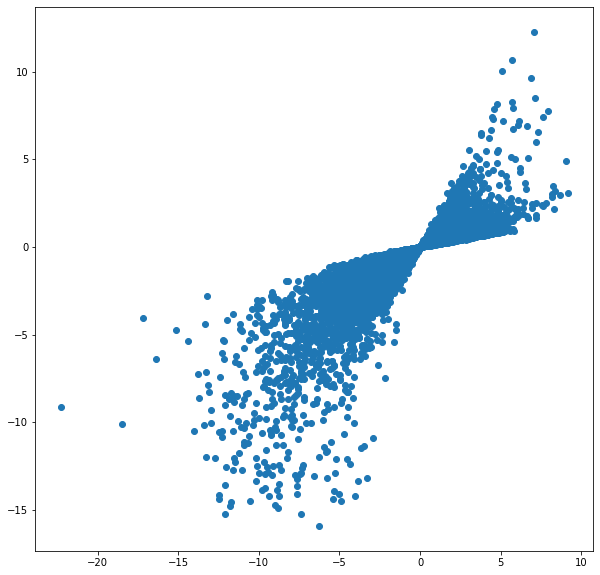

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(results['z-score'], np.log2(results.CI))